# Linear Regression and the Machine Learning Workflow

## CSC/DSC 340 Week 2 Lecture Notes

Dr. [Julie Butler](juliebutler.org)

Week of August 28 - September 1, 2023

## Linear Regression

Linear regression is one of the simplest machine learning algorithms we will study in this course. However, we will learn how to make it a powerful predictor that can be applied to a wide range of problems.

Many machine learning textbooks and courses begin with linear regression, and there are a few reasons for this. First, though it is a simple algorithm, linear regression contains many of the same components as more complicated types of machine learning. These components, such as trained parameters, an optimization procedure, and a functional form for the output, will be discussed in the context of linear regression this week but will be applied to many of the machine learning algorithms we will study this semester, including neural networks. The second reason machine learning is important is that it has a closed-form solution for its optimized parameters, meaning that we can derive and write a single equation that explains how a linear regression algorithm is trained. We will derive this equation later in these notes. This closed-form solution means that given the same training and prediction data, a linear regression algorithm will always produce the same results.  This is in contrast to other types of machine learning, such as neural networks, where the same training process will always result in different predictions (we will discuss why later this semester). The final reason we will be studying linear regression as our first machine learning algorithm is that, while it is common in machine learning, it is also widely used in many fields of science, statistics, and business, so it maybe familar to you from other courses.


### Deriving the Equations for Linear Regression

Due to the simplicity of linear regression, we are able to take a deep dive into its equations and derive the relevant equations, including the loss function and the equation for the optimized parameters.

#### Output
Given a data set (**X**, $\vec{y}$), we want to create a linear regression algorithm which will take the input data, **X**, and produce a prediction of the outputs that is as close to $\vec{y}$ as we can get. Producing the output for a linear regression algorithm is deceptively simple:

$$\hat{y} = \textbf{X}\theta,$$

where **X** is the inputs or x-data for the data set we wish to model (and is either a vector or a matrix depending on if it is one dimensional or two dimensional), $\hat{y}$ are the linear regression predictions of the y-data or the outputs of the data set (and is a vector), and $\theta$ are known as the parameters or weights of the linear regression algorithm and are a vector if **X** is two dimensional and are a scalar if **X** are one dimensional. The value of $\theta$ are what we are trying to "learn" when we use linear regression because we are trying to find values for the parameters such that $\vec{y} \approx \hat{y}$.

Note that $\hat{y}$ is a very common way to represent the outputs from any machine learning algorithm, but some resources may use $y_{pred}$ instead.

#### Loss Function

A loss function, in general, is a quantitative measure of how close our machine learning predictions are to the true data.  There are many different loss functions used in the field of machine learning, but for linear regression we will be using the mean-squared error function (MSE).  For to vectors of the same length N, $\vec{a}$ and $\vec{b}$, we can define the MSE between them as:

$$MSE = \frac{1}{N}\sum_{i=1}^N(\vec{a}_i - \vec{b}_i)^2.$$

A smaller MSE means that the two vectors are closer to each other and a MSE of zero means that the two vectors are identical.  Therefore, for linear regression, we want the value of our loss function to be as close to zero as possible to ensure that our linear regression algorithm is accurately predicting the values of our data set.

Now, we can define the loss function for linear regression as:

$$J(\theta) = \frac{1}{N}\sum_{i=1}^N(\hat{y}_i - \vec{y}_i)^2.$$

Since each of the quantities in the above equation are vectors, we can remove the summation notation and instead write the loss function in terms of vectors:

$$J(\theta) = \frac{1}{N}[\hat{y} - \vec{y}]^T[\hat{y} - \vec{y}].$$

Finally, since $\hat{y} = \textbf{X}\theta$, we can rewrite the loss function in its final form as:

$$J(\theta) = \frac{1}{N}[\textbf{X}\theta - \vec{y}]^T[\textbf{X}\theta - \vec{y}].$$

#### Optimization 

We want to our linear regression algorithm to make accurate predictions, so therefore we need to find values of $\theta$ which minimize the loss function (because a smaller MSE means the data sets closely match).  If we consider the simplest minimization possible, the loss function is minimized where its first derivative is zero.  Therefore,

$$\frac{\partial J(\theta)}{\partial \theta} = 0.$$

We can plug in the loss function to get:

$$\frac{\partial}{\partial \theta} \{\frac{1}{N}[\textbf{X}\theta - \vec{y}]^T[\textbf{X}\theta - \vec{y}]\} = 0,$$

and take the partial derivative to get:

$$X^T[X\theta - y] = 0.$$

Now that we have found the location of the minimum of the loss function, we can solve the above equation for $\theta$ to yield the value of the parameters that minimizes the loss function.  Therefore, :

$$\theta = (X^TX)^{-1}X^Ty.$$

Therefore, given a data set, we can find the optimized values of a linear regression algorithm using the above equation that will allow us to predic the values of new inputs.

$$\hat{y} = \textbf{X}_{new}\theta = \textbf{X}_{new}(X^TX)^{-1}X^Ty$$

Note that in this course you will not have to do any derivations like this without guidance, but it is important to know how machine learning algorithms work and that sometimes requires deriving them from equations.

### Linear Regression with Scikit-Learn
Scikit-Learn is a common machine learning library with easy implementations which allows us to easily switch the machine learning algorithm we are using. [Scikit-Learn's website](https://scikit-learn.org/stable/) has many useful tutorials and examples on how to use the library.  For this example we only need the linear regression implementation, which we can import using:

In [1]:
from sklearn.linear_model import LinearRegression

We will also need NumPy and matplotlib, so let's import those as well.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Now let's create a linear data set that we can use to explore linear regression.

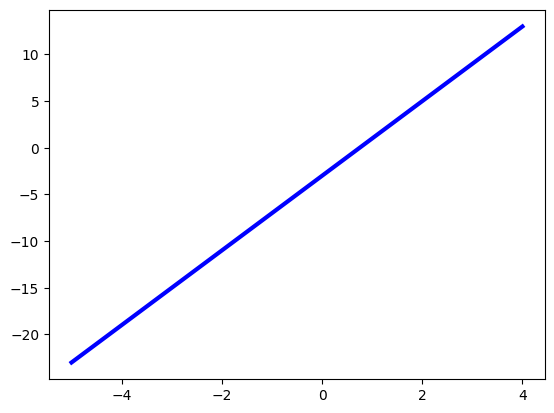

In [3]:
X = np.arange(-5,5)
y = 4*X-3

plt.plot(X,y, color='blue',linewidth=3)

When using Scikit-Learn machine learning algorithms, they require the input data to have specific dimensionality. Since our input data is one-dimensional, we need to reshape it using the following code before we can use the linear regression implementation.

In [4]:
# If the x-data in 1D, reshape as follows
X = X.reshape(-1,1)

Now we can define an instance of the linear regression implementation and fit it using the linear data we generated above.

In [5]:
# Create a linear regression instance using sklearn
linear_regression = LinearRegression()

# Fit the linear regression algoritm using the previously generated data
linear_regression.fit(X,y)

LinearRegression()

The above code "trains" the linear regression algorithm using the data we gave it to find the optimized values of the parameters, $\theta$. We can now used the trained linear regression instance to predict new points on the same line.

In [6]:
# Create new data from the same line in order to test its performance
X_test = np.arange(-10,10,0.1)
y_test = 4*X_test-3

X_test = X_test.reshape(-1,1)

y_pred = linear_regression.predict(X_test)

Now that we have our predicted data set, we can analyze its accuracy.  We will typically do this two ways: analyzing the data graphically compared to the expected results, and quantifying the error in the data compared to the expected values using error metrics. First, let's graphically analyze the predictions by plotting the predicted data and the expected values on the same plot.  Remember to add a key to determine which plot corresponds to which data set.

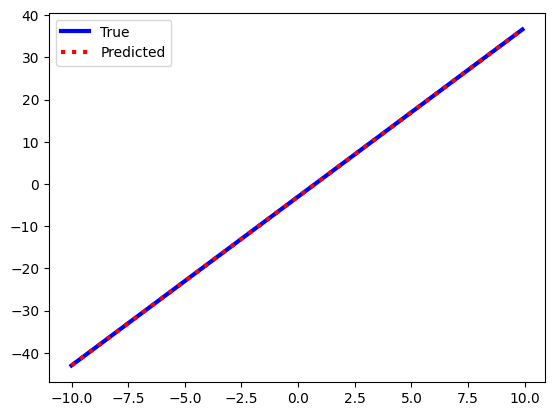

In [7]:
# Graphically check to see if the true and predicted data are similar
plt.plot(X_test,y_test,color='blue',linewidth=3,label="True")
plt.plot(X_test, y_pred, color='red', linewidth=3,linestyle=':', label="Predicted")
plt.legend()

The two plots look very similar but a graphical match is rarely enough evidence to convince other people that your machine learning algorithm can make accurate predictions. You also need to include the results from error metrics which can quantify how diffferent your predictions are from the expected data.  A very common error metric is the MSE, which we defined when talking about the loss function. It is very common to report the MSE between the machine learning predictions and the expected results.  We can do this easily using Scikit-Learn.

In [8]:
from sklearn.metrics import mean_squared_error

print("MEAN SQUARED ERROR:", mean_squared_error(y_test, y_pred))

MEAN SQUARED ERROR: 1.7369681753028576e-28


To interpret this result, this means that each data point differs from the true result by the square root of the MSE on average.  This may be hard to think about, so therefore we can define the root mean-squared error (RMSE) as the square root of the MSE score.

In [9]:
print("ROOT MEAN SQUARED ERROR:", np.sqrt(mean_squared_error(y_test, y_pred)))

ROOT MEAN SQUARED ERROR: 1.3179408846009966e-14


We can interpret a RMSE as the average error on each prediction, so this is a bit easier to see that our linear regression predictions are very close to the true or expected results.  There are a couple of other error metrics we can look at as well.  First is the R2-score, which is a measure of how linear a data set is. A perfect line as a score of 1, the further from 1 the less linear the data set is. If a data set is plotted against itself it will make a perfect line, and thus will have an r2-score of 1.  Therefore, we can calculate the R2-score between our predicted and expected data sets and see how close the results is to 1.  The closer to 1 the closer the two data sets are to being identical.

In [10]:
from sklearn.metrics import r2_score

print("R2-SCORE:", r2_score(y_test, y_pred))

R2-SCORE: 1.0


As expected, the r2-score indicates that these data sets are identical, so our machine learning algorithm is doing a good job of matching the data set.  As a final error metric we can look at the mean absolute percentage error, which tells, as a percentage, how much the data sets differ.  Here 0% means the data sets are identical and larger numbers mean there are differences in the data sets.

In [11]:
from sklearn.metrics import mean_absolute_percentage_error

print("MEAN ABSOLUTE PERCENTAGE ERROR:", mean_absolute_percentage_error(y_test, y_pred), "%")

MEAN ABSOLUTE PERCENTAGE ERROR: 7.656495376191392e-16 %


Finally, if we have a model we know to be true (in this case the equation of the line, y = 4x-3), we can extract the trained parameters from the linear regression model and see if they are correct.  In this case, the one trained weight should be the slope of the line (in this case 4). The Scikit-Learn linear regression algorithm also fits the y-intercept of the data by default so we can also extract that and see if it is correct (in this case it should be -3).

In [12]:
# Check the optimized weights and the slope that are fit by the linear regression algorithm
# The slope should be 4 and the intercept -3 (set when we created the data)
print("LINEAR REGRESSION SLOPE:", linear_regression.coef_)
print("LINEAR REGRESSION INTERCEPT:", linear_regression.intercept_)

LINEAR REGRESSION SLOPE: [4.]
LINEAR REGRESSION INTERCEPT: -3.000000000000001


### Using a Design Matrix to Extend the Applications of Linear Regression

Linear regression, as it has been defined thus far, can only model patterns where the output is a linear combination of any inputs.  This simple pattern covers a suprising number of data sets, but not all of them. In situations where we want to model a data set that does not have a strictly linear pattern, we can still use linear regression, but we will have to make some modifications.

## Unmodified Linear Regression
Assume that we have a data set (**X**, $\vec{y}$) which contains N data points.  Futhermore, assume that each data point in **X** contains m values (thus **X** is a two dimensional data set and can be represented as a matrix).  If we start with the output of a standard linear regression algorithm:

$$$\hat{y} = \textbf{X}\theta,$$

we can plug in the forms of **X** and $\hat{y}$ we have to yield:

$$ \begin{bmatrix}
    \hat{y}_0 \\
    \hat{y}_1 \\
    \hat{y}_2 \\
    . \\
    . \\
    . \\
    \hat{y}_m
\end{bmatrix} = \begin{bmatrix}
X_{00} & X_{01} & X_{02} & . & . & . & X_{0m} \\
X_{10} & X_{11} & X_{12} & . & . & . & X_{1m} \\
X_{20} & X_{21} & X_{22} & . & . & . & X_{2m} \\
. & . & . & . & . & . & . \\
. & . & . & . & . & . & . \\
. & . & . & . & . & . & . \\
X_{N0} & X_{N1} & X_{N2} & . & . & . & X_{Nm} \\
\end{bmatrix}\begin{bmatrix}
\theta_0 \\
\theta _1 \\
\theta _2\\
. \\
. \\
. \\
\theta_m
\end{bmatrix}
$$

We can use vector-matrix multiplication to expand the above and get an equation for each value in the $\hat{y}$ vector:
$$\hat{y}_i = X_{i0}\theta_0 + X_{i1}\theta_1 + X_{i2}\theta_2 + ... + X_{im}\theta_m$$

Thus, every linear regression prediction is a linear combination of the inputs, modified by the optimized paramters.  While this works well for data sets with linear patterms, many data sets we come across will not have such simple patterns.  Thus, we need to find a way to extend the types of problems linear regression can be applied to in order to make it a useful machine learning algorithm.

### Fitting non-linear curves

Consider the following data set:

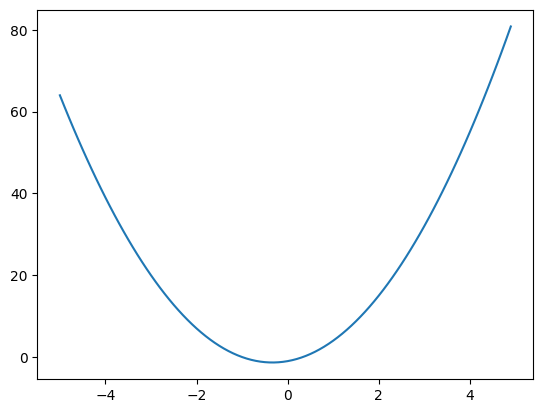

In [13]:
X = np.arange(-5,5,0.1)
y = 3*X**2 + 2*X - 1

plt.plot(X,y)

If we tried to fit this data set with linear regression, the only way it can model the data is with a straight line, which is not a good model for this data.

RMSE: 116.7218917769919


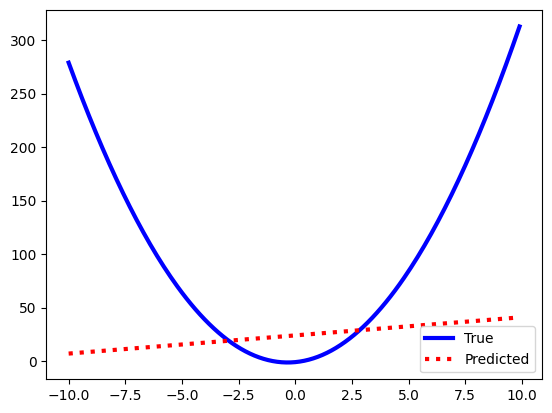

In [14]:
X = X.reshape(-1,1)

linear_regression = LinearRegression()
linear_regression.fit(X,y)

X_test = np.arange(-10, 10, 0.1)
y_test = 3*X_test**2 + 2*X_test -1

X_test = X_test.reshape(-1,1)

y_pred = linear_regression.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))

plt.plot(X_test,y_test,color='blue',linewidth=3,label="True")
plt.plot(X_test, y_pred, color='red', linewidth=3,linestyle=':', label="Predicted")
plt.legend()

We need a way to force the linear regression algorithm to fit non-linear data sets, and we will do this with something called a design matrix. Instead of passing the linear regression algorithm **X**, we will instead pass it a matrix with three columns--**X**$^2$, **X**, and 1--so that the results of the trained linear regression algorithm will be:

$$\hat{y}_i = \textbf{X}_i^2\theta_0 + \textbf{X}_i\theta_1 + 1\theta_2,$$

which is the equation for a quadratic curve.  Since we created the curve and know what the coefficients should be then we know that $\theta_0$ should be 3, $\theta_1$ should be 2, and $\theta_2$ should be -1.  We can create our design matrix using the below code cell.

In [15]:
X = X.flatten()

column_one = X**2
column_two = X
column_three = np.ones(len(X))

X_design_matrix = np.array([column_one, column_two, column_three]).T

Now we want to train a linear regression algorithm with the new design matrix.  Since we are already fitting the intercept of the data with the design matrix (using the column of ones), we need to set the argument `fit_intercept` to False.

In [16]:
linear_regression = LinearRegression(fit_intercept=False)
linear_regression.fit(X_design_matrix, y)

LinearRegression(fit_intercept=False)

Now to test the new method, we also need to format the test data set in the same manner before doing the predictions.

In [17]:
X_test = X_test.flatten()

column_one = X_test**2
column_two = X_test
column_three = np.ones(len(X_test))

X_test_design_matrix = np.array([column_one, column_two, column_three]).T

y_pred = linear_regression.predict(X_test_design_matrix)

And we see that our predictions are now an exact match for the expected data set.  Thus by using a design matrix we have extended the range of problems linear regression can be applied to past just simple linear relationships.

RMSE: 8.290028596924758e-14


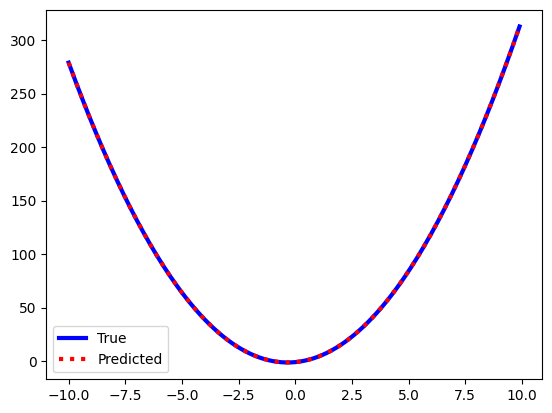

In [18]:
print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))

plt.plot(X_test,y_test,color='blue',linewidth=3,label="True")
plt.plot(X_test, y_pred, color='red', linewidth=3,linestyle=':', label="Predicted")
plt.legend()

Finally, we can confirm that the trained parameters of the linear regression algorithm are exactly what is expected.

In [19]:
linear_regression.coef_

array([ 3.,  2., -1.])

Design matrices are very powerful extensions to linear regression and the do not require you to know a functional form of your data.  If a theoretical model exists for the data (as in the above and below examples) this makes the process easier, but a [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) can also be used as a design matrix when no theoretical model is known.

### Real World Example

The force between two electrons can be modeled using the following equation:

$$F = \frac{kq^2}{r^2},$$

where q is the charge of an electron (-1.69e-19 C), r is the separation between the two electrons in meters, and k is a scaling constant. The goal of this problem is to determine the value of k using linear regression and measurements of the force and separation between two electrons.

First we import the data set from the web using Pandas and save it as a Dataframe.

In [20]:
import pandas as pd
force_dataset = pd.read_csv('https://raw.githubusercontent.com/butler-julie/DSC340LectureNotes/main/week2_slides.csv')
force_dataset

,Unnamed: 0,r,F
0,0,1.000000e-10,2.570490e-08
1,1,1.100000e-10,2.124372e-08
2,2,1.200000e-10,1.785062e-08
3,3,1.300000e-10,1.521000e-08
4,4,1.400000e-10,1.311474e-08
...,...,...,...
86,86,9.600000e-10,2.789160e-10
87,87,9.700000e-10,2.731948e-10
88,88,9.800000e-10,2.676479e-10
89,89,9.900000e-10,2.622681e-10


Next we extract the data we need and plot it to ensure it resembles the expected 1/r$^2$ curve.

In [21]:
r = np.asarray(force_dataset['r'])
F = np.asarray(force_dataset['F)'])
plt.plot(r,F)
plt.xlabel('Separation (m)')
plt.ylabel('Force Between Charges (C)')

KeyError: 'F)'

We can rewrite the force equation slightly to better see our approach:

$$ F = \frac{kq^2}{r^2} = kq^2\frac{1}{r^2}.$$

$kq^2$ is a constant, the constant we are going to try to predict with linear regression, making it the parameter, $\theta$.  This means that the **X** data will be $\frac{1}{r^2}$.  So let's train a linear regression algorithm with the inputs being $\frac{1}{r^2}$ and the outputs being the force data.  Then we can extract the trained coefficient.

In [57]:
r_squared = r**2
r_squared_inverse = 1/r_squared

r_squared_inverse = r_squared_inverse.reshape(-1,1)

linear_regression = LinearRegression()
linear_regression.fit(r_squared_inverse, F)
coef = linear_regression.coef_
print(coef)

[2.57049e-28]


This trained coeffiecient is $kq^2$, so if we want to extract just k we will need to divide twice by the charge of the electron to find the expected value of k being $9e9 \frac{Nm^2}{C^2}$.

In [58]:
charge_electron = 1.69e-19
k = coef/charge_electron/charge_electron
print("Constant:", k)

Constant: [9.e+09]


This was a simple example of using a design matrix to extract physical constants from data sets. In the in-class assignment this week we will look at a more complicated example involving the binding energies data set from the week 1 in-class assignment. 

# The Machine Learning Workflow

The machine learning workflow describes the process of taking a data set, formatting it, training a machine learning model, and using that trained machine learning model to make predictions. The steps involved in most machine learning workflows are as follows:
    * Import the data set, perform an initial analysis
    * Split the data into a training set and a test set
    * Train the machine learning algorithm with the training set
    * Test the performance of the trained model with the test set using numerical metrics and visual analysis
    * (Optional) Improve the performance of the algorithm by either reformatting the data OR changing the parameters of the machine learning algorithm

The first step involves importing the data set from a file, a Python library, or from the web and making it useable. This includes removing some of the data that does not fit the required format, changing parts of the data set from non-numeric to numeric entries, changing the units on the data, etc. We went through some of this process in the week 1 in-class assignment and will see many more examples throughout this course. 

The second step in the machine learning workflow is to split the data set into a training set and a test set. The training set, which is usually 70% - 80% of the total data, is used to train the machine learning model and the test set, the remaining 20%-30% of the data, is used to test the performance and accuracy of the model. It is important that the machine learning model is never trained using the test set so that you get an accurate measure of how the trained model performs on data it has never seen before. The most common way to create the two data sets is to randomly split up the data, usually done with the Scikit-Learn function `train_test_split`, but it is possible to do other data splits depending on the goal of the machine learning. Towards the end of this course when we cover recurrent neural networks, we will split out data into two sequentially instead of randomly because we are interested in extrapolation and future predictions. Note that somtimes the training data set is further split into a validation data set and we will cover this in more detail next week when we discuss hyperparamter tuning.

After the data set is split, the training set is used to to train the machine learning model (i.e. used to find the optimized values of the model's parameters). After the model is trained, the test data set (which the model has never seen before) is used to test its performance. The input component of the test set is passed to the trained model to generate a predicted data set.  This predicted data set is then compared to the true test data set using both graphs (for visually analysis) and numerical error metrics such as the mean-squared error or the R2-score.

Finally, if you are unhappy with the results from your machine learning model you can make changes and retry. Some things you can do is reformat the data, perform feature engineering on the data (only passing selected parts of the input data instead of the entire input data set), changing the parameters of the model (discussed next week as well), or even changing the entire machine learning algorithm to a different algorithm that may work better with the data set. 

Chapter 2 of the textbook *Hands-On Machine Learning* has a detailed walkthrough to the machine learning workflow using a famous machine learning data set called the "Boston Housing Market" data set. The slides for this week walk through the machine learning workflow with another famous data set called the "Diabetes" data set. Finally, appendix B of *Hands-On Machine Learning* has a checklist for all of the steps in the machine learning workflow, broken down into small pieces. This checklist will be helpful for you has you start thinking about the data set and problem you want to use for your final project.